In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
df = pd.read_csv("datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})

C:\Users\ESP\AppData\Local\Temp\ipykernel_6692\259325695.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = df.drop('Cabin', axis=1)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7925.0000,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [7]:
df['Age'].fillna((df['Age'].mean()), inplace=True)

C:\Users\ESP\AppData\Local\Temp\ipykernel_6692\533104584.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna((df['Age'].mean()), inplace=True)


In [8]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\ESP\AppData\Local\Temp\ipykernel_6692\411043493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [9]:
# name ticket y embarked
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)
df = df.drop('Embarked', axis=1)
df = df.drop('PassengerId', axis=1)

In [10]:
# Separar características (X) y variable objetivo (y)
X = df.drop(columns=["Survived"])  # Excluir la variable objetivo
y = df["Survived"]                 # Variable objetivo

# Dividir los datos en un 80% para entrenamiento y un 20% para evaluación (validación + test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=675)

# Escalar después de la división
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Escalamos solo con el fit del entrenamiento

In [11]:
svc = SVC(kernel='poly', C=1.0, gamma=1.0).fit(X_train_scaled, y_train)

In [12]:
# svc = SVC(kernel='poly', C=1.0, gamma=1.0, degree=2).fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       123
           1       0.69      0.82      0.75        56

    accuracy                           0.83       179
   macro avg       0.80      0.83      0.81       179
weighted avg       0.84      0.83      0.83       179



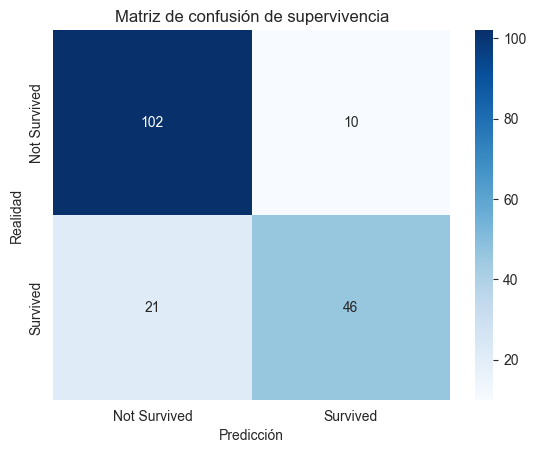

In [13]:
y_pred = svc.predict(X_test_scaled)
print(classification_report(y_pred, y_test.astype(int)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de confusión de supervivencia")
plt.show()

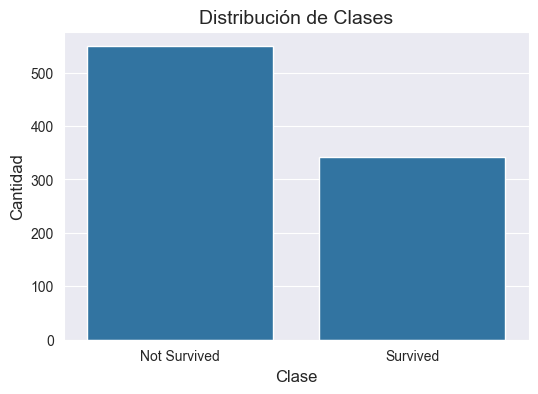

In [14]:
# Supongamos que la columna de clases es 'is_duplicate'
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived')

# Etiquetas y título
plt.title("Distribución de Clases", fontsize=14)
plt.xlabel("Clase", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.show()

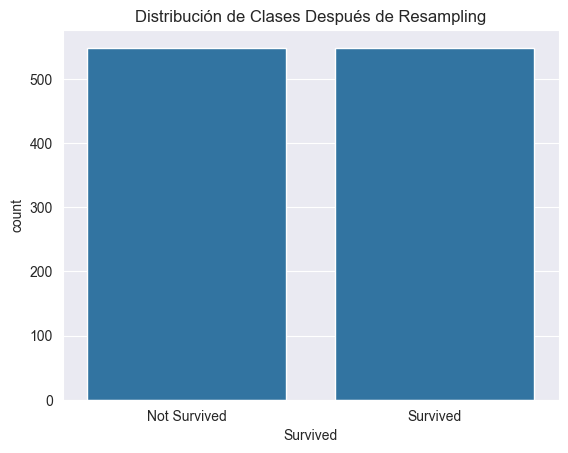

In [16]:
# Separar las clases
clase_mayoritaria = df[df['Survived'] == 0]
clase_minoritaria = df[df['Survived'] == 1]

# Hacer oversampling de la clase minoritaria
clase_minoritaria_aumentada = resample(
    clase_minoritaria,
    replace=True,                      # muestreo con reemplazo
    n_samples=len(clase_mayoritaria), # igualar al número de la clase mayoritaria
    random_state=42
)

# Combinar para tener un dataset balanceado
df_balanceado = pd.concat([clase_mayoritaria, clase_minoritaria_aumentada])

# Barajar las filas
df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar nuevo balance
sns.countplot(data=df_balanceado, x='Survived')
plt.title("Distribución de Clases Después de Resampling")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.show()


In [17]:
# Separar características (X) y variable objetivo (y)
X = df_balanceado.drop(columns=["Survived"])  # Excluir la variable objetivo
y = df_balanceado["Survived"]                 # Variable objetivo

# Dividir los datos en un 80% para entrenamiento y un 20% para evaluación (validación + test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=675)

# Escalar después de la división
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Escalamos solo con el fit del entrenamiento

In [18]:
svc = SVC(kernel='poly', C=1.0, gamma=1.0).fit(X_train_scaled, y_train)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       114
           1       0.77      0.81      0.79       106

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220



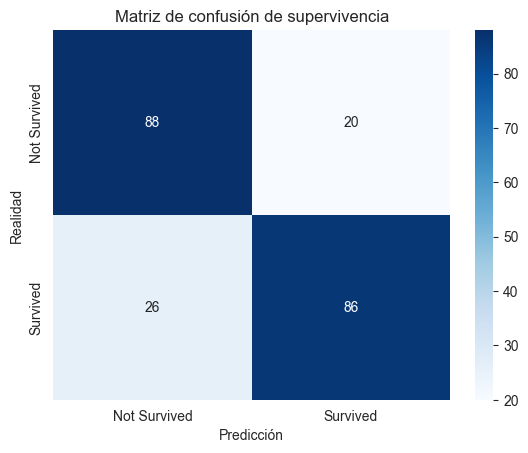

In [19]:
y_pred = svc.predict(X_test_scaled)
print(classification_report(y_pred, y_test.astype(int)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de confusión de supervivencia")
plt.show()